In [57]:
cd /content/drive/MyDrive/2nd_project_elice

/content/drive/MyDrive/2nd_project_elice


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [59]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

In [60]:
pd.options.display.max_columns = None
articles.head(5)

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  \
0                     Solid                  9             Black   
1                     Solid                 10             White   
2                    Stripe                 11         Off White   
3                     Solid                  9             Black   
4                     Solid                 10             White   

   perceived_colour_value_id perceived_colour_value_name  \
0                          4                        Dark   
1                          3                       Light   
2                          1                 Dusty Light   
3                          4                        Dark   
4                          3                       Light   

   perceived_colour_master_id perceived_colour_master_name  department_no  \
0                           5                        Black           1676   
1                           9                        White           1676   
2                           9                        White           1676   
3                           5                        Black           1339   
4                           9                        White           1339   

  department_name index_code        index_name  index_group_no  \
0    Jersey Basic          A        Ladieswear               1   
1    Jersey Basic          A        Ladieswear               1   
2    Jersey Basic          A        Ladieswear               1   
3  Clean Lingerie          B  Lingeries/Tights               1   
4  Clean Lingerie          B  Lingeries/Tights               1   

  index_group_name  section_no            section_name  garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics              1002   
1       Ladieswear          16  Womens Everyday Basics              1002   
2       Ladieswear          16  Womens Everyday Basics              1002   
3       Ladieswear          61         Womens Lingerie              1017   
4       Ladieswear          61         Womens Lingerie              1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...

In [61]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [62]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [63]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [64]:
pd.options.display.max_rows = None
articles.groupby(["product_group_name", "product_type_name"]).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [65]:
from PIL import Image
import cv2

In [66]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

In [67]:
# 2020 - 04 - 01 ~ 2020 - 06 - 01 / 중복된 article_id  제거
transactions["t_dat"] = pd.to_datetime(transactions['t_dat'])
transactions = transactions.loc[transactions.t_dat >= pd.to_datetime('2020-04-01')] #
transactions = transactions.loc[transactions.t_dat <= pd.to_datetime('2020-06-01')] #
# transactions = transactions.astype({"article_id" : "str"})
transactions = transactions.drop_duplicates(['article_id'], ignore_index = True)
transactions.shape

(33790, 5)

In [68]:
transactions.head()

t_dat                                        customer_id  article_id  \
0 2020-04-01  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   727808001   
1 2020-04-01  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   727808007   
2 2020-04-01  000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...   567532015   
3 2020-04-01  000563485cbb7850b0a93c6606f89c5b961c6647d1bd48...   706104009   
4 2020-04-01  00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   783504004   

      price  sales_channel_id  
0  0.067780                 2  
1  0.067780                 2  
2  0.042356                 2  
3  0.042356                 2  
4  0.019051                 2

In [69]:
articles = pd.read_csv("articles.csv")

In [70]:
# t-shirt 이미지가 없는 데이터 제거(현재는 1개 밖에 없어서 수동 처리) / 자동화 방법 -> try ~ catch 를 사용해서 이미지를 열었을때 에러가 난다면(없을 경우) 아래와 같이 drop 해주는 방식?
articles['article_id'] = articles['article_id'].astype(str)
index1 = articles[articles['article_id'] == "806139001"].index
articles = articles.drop(index1)
articles['article_id'] = articles['article_id'].astype(int)

In [ ]:
articles['article_id'] = articles['article_id'].astype(str)
index1 = articles[articles['article_id'] == article_id].index
articles = articles.drop(index1)

In [71]:
def want_product_with_price(article, product):
  article = article[article["product_type_name"] == product]
  article = article.loc[:, ["article_id", "prod_name", "product_type_name", "colour_group_name", "detail_desc"]].reset_index(drop = True)
  article = pd.merge(article, transactions, how='inner', on="article_id")
  article = article.drop(columns=["t_dat", "customer_id",  "sales_channel_id"])
  article = article.sort_values(by="price", ascending=False).reset_index(drop = True)[:20]
  article['price'] = article['price'].map(lambda x : int(round(x*1000*1200, -2)))
  article['article_id'] = article['article_id'].map(lambda x : ("0" + str(x)))
  return article

In [75]:
a = want_product_with_price(articles, "Sweater")
a.head(-5)

article_id                      prod_name product_type_name  \
0   0776776001                D2 PE KLUM KNIT           Sweater   
1   0786844003  Premium OLGA cashmere sweater           Sweater   
2   0776737002         D2 PE ORION CABLE KNIT           Sweater   
3   0844086001              SC KUSAMA crochet           Sweater   
4   0789395001           SC POMPERIPOSSA knit           Sweater   
5   0832819002           PQ OLEG WOOL SWEATER           Sweater   
6   0804190003        Christel knitted jumper           Sweater   
7   0828780001             PQ ARYA SWEATSHIRT           Sweater   
8   0771759006           PQ COCOS CASH SL TOP           Sweater   
9   0832889001              PQ LANY CASH PIKE           Sweater   
10  0734448001         Regal knitted cardigan           Sweater   
11  0771759007           PQ COCOS CASH SL TOP           Sweater   
12  0786844001  Premium OLGA cashmere sweater           Sweater   
13  0689998001                ORANGE half zip           Sweater   
14  0789399002                 SC BRIGHT knit           Sweater   

   colour_group_name                                        detail_desc  \
0          Off White  Wide jumper in a soft, rib-knit cashmere blend...   
1    Yellowish Brown  Jumper knitted in soft cashmere with a round n...   
2             Yellow  Cable-knit jumper in a soft wool blend contain...   
3         Other Pink  STUDIO COLLECTION. Cropped, boxy-style jumper ...   
4        Light Beige  STUDIO COLLECTION. Short jumper knitted in a w...   
5             Orange  Rib-knit jumper in wool containing some cashme...   
6         Dark Green  Jumper in a soft, chunky-knit alpaca blend wit...   
7              Green  Oversized top in sweatshirt fabric made from a...   
8         Light Grey  Jumper knitted in soft cashmere. Short raglan ...   
9              White  Short-sleeved jumper in soft, fine-knit cashme...   
10             Black  Oversized cardigan in a wool knit with decorat...   
11        Light Pink  Jumper knitted in soft cashmere. Short raglan ...   
12         Dark Grey  Jumper knitted in soft cashmere with a round n...   
13             Black  Jumper knitted in a merino wool and cashmere b...   
14         Dark Blue  STUDIO COLLECTION. Wide, polo-neck jumper in a...   

     price  
0   262400  
1   201800  
2   201400  
3   183000  
4   162700  
5   162700  
6   142400  
7   142400  
8   142400  
9   142400  
10  140900  
11  134200  
12  134200  
13  132200  
14  130100

In [55]:
# 셔츠(T-shirt) / 니트(Sweater) / 청바지(Trousers) / 치마(Skirt) / 신발(Sneakers)
for item in ["T-shirt", "Sweater", "Trousers", "Skirt", "Sneakers"]:
  a = want_product_with_price(articles, item)
  a.to_json(f"data/{item}/json/{item}.json", orient = 'records')
  for article_id in a['article_id'].tolist():
    try:
      image = Image.open(f"images/{article_id[:3]}/{article_id}.jpg")
      image.save(f'data/{item}/image/{article_id}.jpg')
    except:
      pass

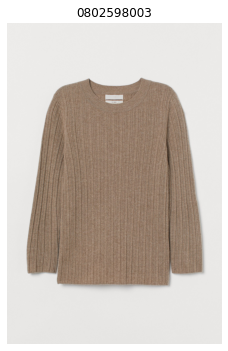

In [19]:
# show_images(802598003)